# Simple example of G3tHWP

G3tHWP outputs HWP angle synchronized to IRIG time.

In [3]:
import numpy as np
import scipy as sp
from g3thwp import G3tHWP
import sotodlib.io.load_smurf as load_smurf
import matplotlib.pyplot as plt
import scipy.interpolate
from spt3g import core
import so3g

In [4]:
#archive_path = '/path/to/data/hk/'
archive_path = '/mnt/SOdata/pton-tsat/hk/'
HWP = G3tHWP(archive_path,g3out_path='.')
start = 1643342329
end = 1643342929
fast_time, angle, slow_time, stable, locked, hwp_rate =  HWP.load_data(start, end)

In [5]:
print(fast_time, angle, slow_time, stable, locked, hwp_rate)

[1.64334233e+09 1.64334233e+09 1.64334233e+09 ... 1.64334293e+09
 1.64334293e+09 1.64334293e+09] [0.65587636 0.66138793 0.66689949 ... 1.67551608 1.68102765 1.68653921] [1.64334233e+09 1.64334233e+09 1.64334233e+09 ... 1.64334293e+09
 1.64334293e+09 1.64334293e+09] [ True  True  True ...  True  True  True] [False  True  True ...  True  True  True] [0. 0. 0. ... 0. 0. 0.]


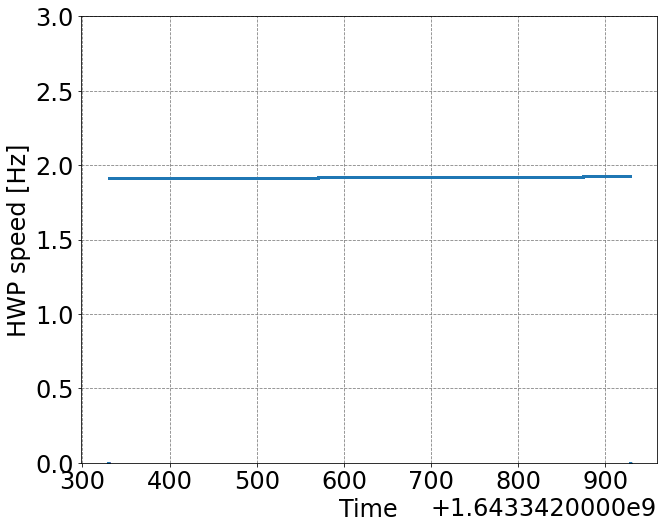

In [6]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('HWP speed [Hz]')
plt.plot(slow_time, hwp_rate, '.',markersize=1)
plt.ylim(0,3)
plt.show()

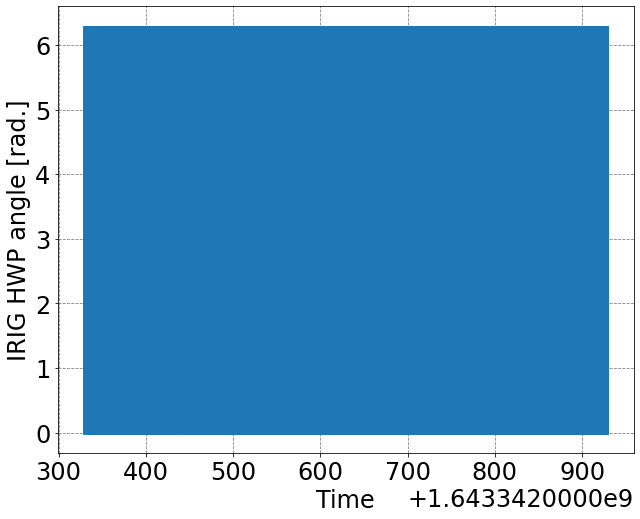

In [7]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('IRIG HWP angle [rad.]')
plt.plot(fast_time, angle, '.',markersize=4)
plt.show()

## Read created angle g3 file

In [8]:
data = so3g.hk.load_range(start, end, data_dir="./")

In [9]:
data

{'hwp.hwp_rate': (array([1.64334233e+09, 1.64334233e+09, 1.64334233e+09, ...,
         1.64334293e+09, 1.64334293e+09, 1.64334293e+09]),
  array([0., 0., 0., ..., 0., 0., 0.])),
 'hwp.locked': (array([1.64334233e+09, 1.64334233e+09, 1.64334233e+09, ...,
         1.64334293e+09, 1.64334293e+09, 1.64334293e+09]),
  array([1, 1, 1, ..., 1, 1, 1], dtype=int64)),
 'hwp.stable': (array([1.64334233e+09, 1.64334233e+09, 1.64334233e+09, ...,
         1.64334293e+09, 1.64334293e+09, 1.64334293e+09]),
  array([1, 1, 1, ..., 1, 1, 1], dtype=int64)),
 'hwp.hwp_angle': (array([1.64334233e+09, 1.64334233e+09, 1.64334233e+09, ...,
         1.64334293e+09, 1.64334293e+09, 1.64334293e+09]),
  array([1.42749561, 1.43300718, 1.43851874, ..., 1.67551608, 1.68102765,
         1.68653921]))}

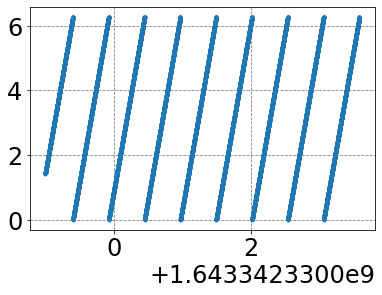

In [10]:
#plt.plot(data["hwp.hwp_rate"][0],data["hwp.hwp_rate"][1],".")
n=10000
plt.plot(data["hwp.hwp_angle"][0][:n],data["hwp.hwp_angle"][1][:n],".")

In [11]:
time = data["hwp.hwp_angle"][0]
angle = data["hwp.hwp_angle"][1]

# Example of linear interpolation between IRIG and SMuRF timing

**HWP spinning at around 2Hz** <br>
/pton-rd/timestreams/16433/crate1slot4/1643342329_000.g3 <br>
/pton-rd/timestreams/16433/crate1slot4/1643342329_001.g3

In [12]:
#archive_path = '/path/to/data/timestream/'
archive_path = '/mnt/SOdata/pton-rd/timestreams/16433/crate1slot4'
g3_data = load_smurf.load_file([   
    archive_path + '/1643342329_000.g3',
    archive_path + '/1643342329_001.g3',
])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.47s/it]


In [13]:
smurf_timestamp = g3_data.timestamps

In [14]:
smurf_angle = scipy.interpolate.interp1d(time, angle, kind='linear',fill_value='extrapolate')(smurf_timestamp)

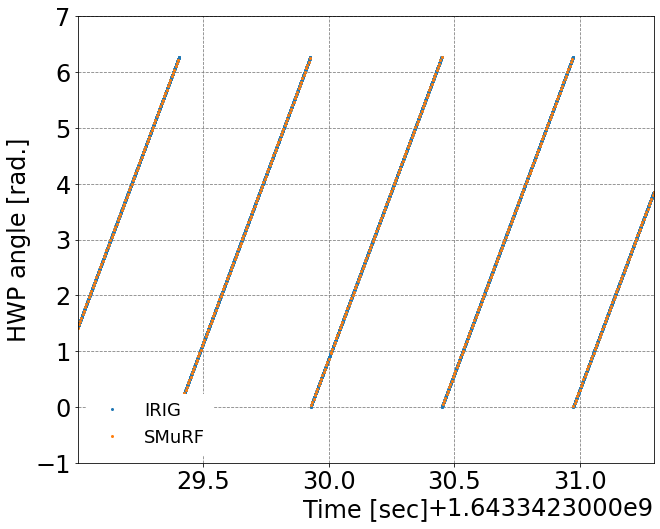

In [15]:
n = 5000
plt.figure(figsize=(10,8))
plt.xlabel('Time [sec]')
plt.ylabel('HWP angle [rad.]')
plt.plot(time, angle, '.',markersize=4, label='IRIG')
plt.plot(smurf_timestamp, smurf_angle, '.', markersize=4, label ='SMuRF')
plt.xlim(time[0],time[n])
plt.ylim(-1,7)
plt.legend()
plt.show()